In [2]:
######################################################################
#### This code compares four popular low-level image segmentation ####
#### methods. These methods are usually used to get an oversegme- ####
#### -ntation, also known as SUPERPIXELS.                         ####
####                                                              ####
#### Following are the four algorithms we will be seeing:         ####
####                                                              ####
#### a) Felenszwalb's efficient graph based segmentation.         ####
#### b) Quickshift image segmentation.                            ####
#### c) SLIC -K-Means based image segmentation.                   ####
#### d) Compact watershed segmentation of gradient images.        ####
####                                                              ####
######################################################################

In [3]:
# Importing the relevant packages

import matplotlib.pyplot as plt
import numpy as np

from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel 
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float 


In [4]:
# loading the image 
img = img_as_float(astronaut()[::2, ::2])

In [13]:
# Perfoming segmentations 
segments_fz = felzenszwalb(img, scale = 100, sigma = 0.5, min_size = 50)
segments_slic = slic(img, n_segments = 250, compactness = 10, sigma = 1)
segments_quick = quickshift(img, kernel_size = 3, max_dist = 6, ratio = 0.5)
gradient = sobel(rgb2gray(img))
segments_watershed = watershed(gradient, markers = 250, compactness = 0.001)

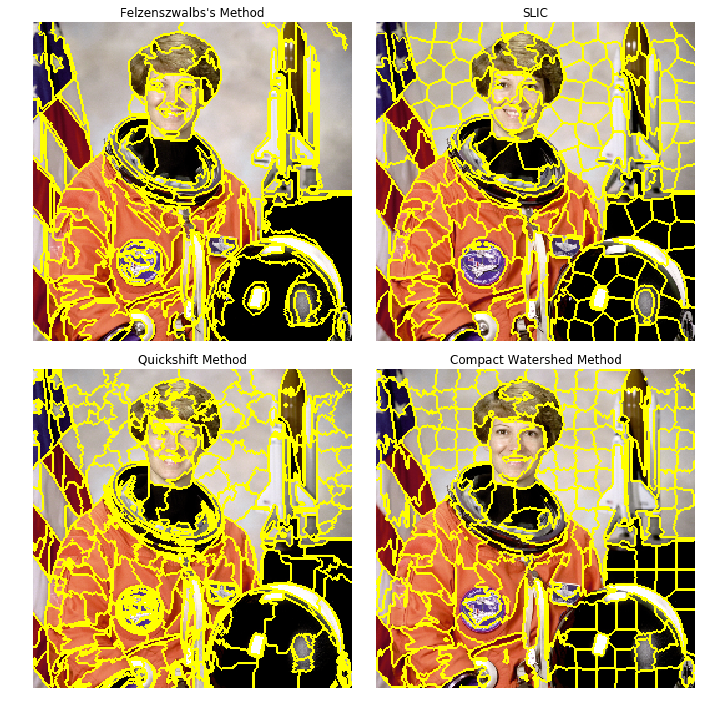

In [27]:
# Plotting the image and the superpixels created. 
fig, ax = plt.subplots(2,2, figsize = (10,10), sharex = True, sharey = True)

ax[0,0].imshow(mark_boundaries(img,segments_fz))
ax[0,0].set_title("Felzenszwalbs's Method")

ax[0,1].imshow(mark_boundaries(img,segments_slic))
ax[0,1].set_title("SLIC")

ax[1,0].imshow(mark_boundaries(img,segments_quick))
ax[1,0].set_title("Quickshift Method")

ax[1,1].imshow(mark_boundaries(img,segments_watershed))
ax[1,1].set_title("Compact Watershed Method")

for a in ax.ravel():
    a.set_axis_off()
    
plt.tight_layout()
plt.show()